In [271]:
%matplotlib notebook
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [272]:
import numpy as np
import pandas as pd
import datetime as dt

In [273]:
#REFLECT TABLES INTO SQLALCHEMY ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func  

In [274]:
# create engine to hawaii.sqlite
data_path="Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{data_path}", echo=False) 

In [275]:
##-----------------------------EXPLORE DATABASE------------------------------------------##

inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [276]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [277]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [278]:
engine.execute('SELECT * FROM station limit 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [279]:
engine.execute('SELECT * FROM measurement limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [280]:
##-----------------------------PRECIPITATION ANALYSIS---------------------------------------##


In [281]:
#REFLECT AND QUERY DATES
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement=Base.classes.measurement

In [282]:
# Create a database session object
session = Session(engine)

In [283]:
#Start by finding the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [284]:
#Using this date, retrieve the last 12 months of precipitation 
#data by querying the 12 preceding months of data. 
#Note you do not pass in the date as a variable to your query.

year_ago = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
year_ago

'2017-08-23'

In [285]:
last_twelve_months = dt.datetime.strptime(year_ago, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [286]:
#Select only the date and prcp values.
results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
results

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [287]:
session.close()

In [288]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
#Sort the DataFrame values by date
Prcp_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
Prcp_df.set_index('Date', inplace=True)
Prcp_df.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


In [289]:
Prcp_df.dtypes

Precipitation    float64
dtype: object

<IPython.core.display.Javascript object>


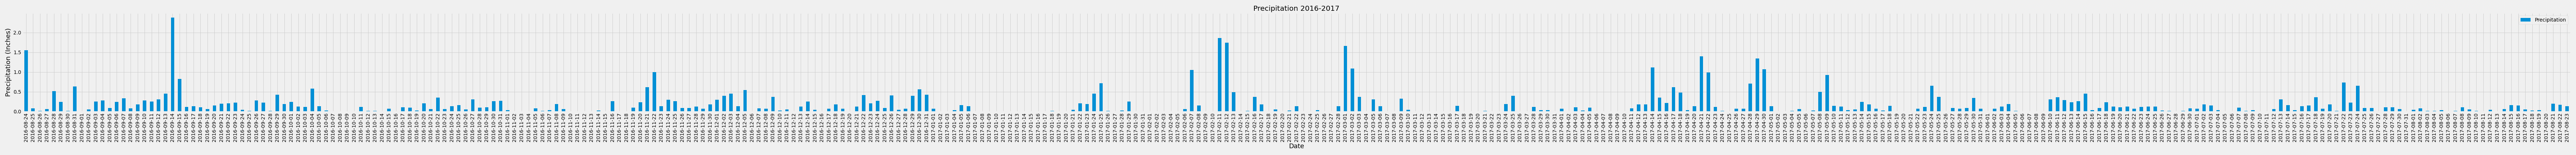

In [290]:
Prcp_df.plot(kind="bar", figsize=(100,6))
plt.title("Precipitation 2016-2017", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


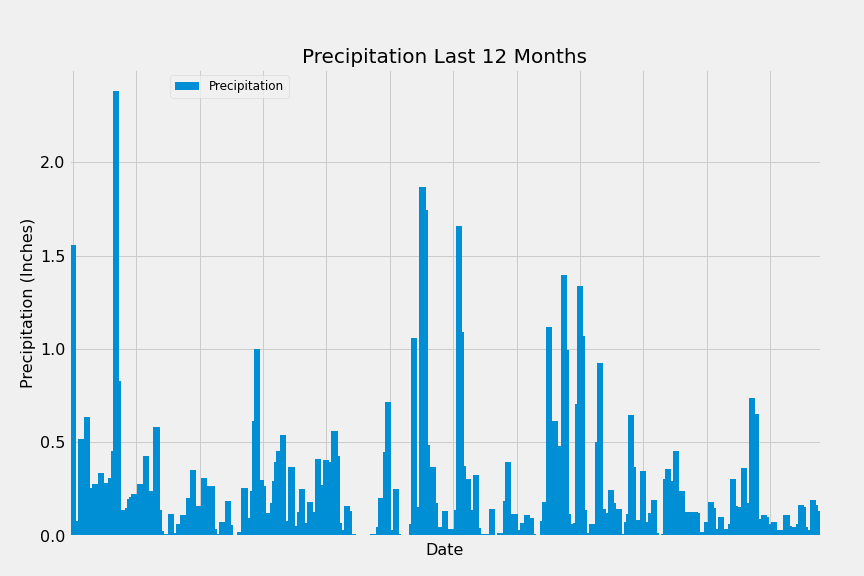

<function matplotlib.pyplot.show(block=None)>

In [306]:
ax = Prcp_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=12)


ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="12")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=16)
plt.xlabel("Date", size=16)
plt.savefig("Images/Precipitation.png")
plt.show

In [292]:
# Print the summary statistics for the precipitation data
Prcp_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [293]:
##-------------------------------- STATION ANALYSIS -------------------------------------##  

In [294]:
#REFLECT AND QUERY STATION
Base = automap_base()
Base.prepare(engine, reflect=True)
Station=Base.classes.station

In [295]:
# Create a database session object
session = Session(engine)

In [296]:
# Calculate the total number of stations
session.query(Station.id).count()

9

In [297]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order

results = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [298]:
#Which station id has the highest number of observations?
Max_observ_Id=session.query(Station.id).filter(Station.station=='USC00519281').all()
Max_observ_Id

[(7,)]

In [299]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()


[(54.0, 71.66378066378067, 85.0)]

In [300]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).

In [301]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= last_twelve_months).all()


#tobs_df.set_index('station', inplace=True)


In [302]:
session.close()

In [303]:
tobs = pd.DataFrame(temperature)
tobs_df=tobs.rename(columns={0:"station", 1:"tobs"})
tobs_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


<IPython.core.display.Javascript object>


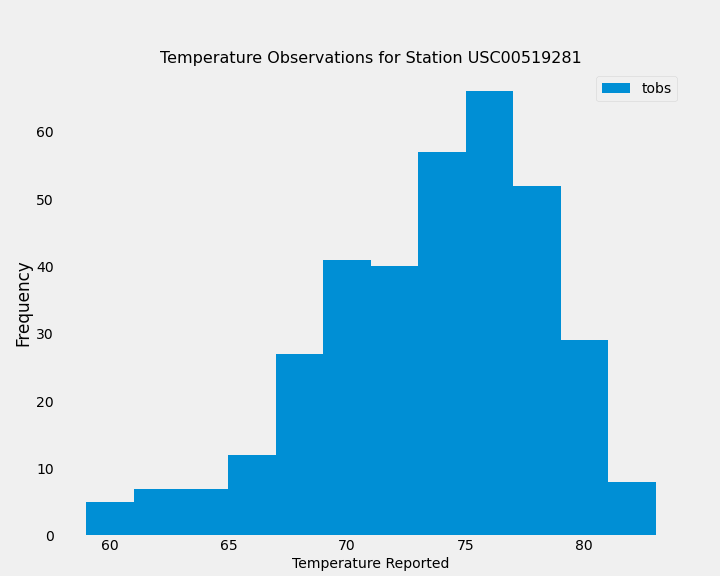

In [307]:
# Plot the results as a histogram with bins=12.
tobs_df.plot.hist(by='station', bins=12, figsize=(10,8))
plt.title("Temperature Observations for Station USC00519281", fontsize=16)
plt.xlabel("Temperature Reported", fontsize=14)
plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.savefig("Images/StatTemp.png")
plt.grid()
plt.show()